<a href="https://colab.research.google.com/github/angelfercontreras/IA_Redes_Neuronales/blob/main/PIA/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PIA.- Entrenamiento de una red neuronal convolucional**

In [1]:
'''
Materia: Inteligencia Artificial y Redes Neuronales
Hora: N4

Integrantes:
Yessica Sughey Cantú Moron           - 1900009
Jean Carlos Javier Rubio Camarillo   - 2016184
Angel Fernando Contreras García      - 2017929
Edwin Osbaldo Sánchez Guzmán         - 1966611
Hugo Andriy Sánchez Ramírez          - 1977112
'''

'\nMateria: Inteligencia Artificial y Redes Neuronales\nHora: N4\n\nIntegrantes:\nYessica Sughey Cantú Moron           - 1900009\nJean Carlos Javier Rubio Camarillo   - 2016184\nAngel Fernando Contreras García      - 2017929\nEdwin Osbaldo Sánchez Guzmán         - 1966611\nHugo Andriy Sánchez Ramírez          - 1977112\n'

In [2]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os

In [ ]:
!pip install kaggle
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"angelcontrerasg","key":"42ee3f48e56dcf320004081405659764"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d niteshfre/chessman-image-dataset

Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/chessman-image-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [7]:
imagenes = []
etiquetas = []

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Chessman-image-dataset/Chess'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (150,150), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Ruta donde se encuentran las imágenes descomprimidas
data_dir = "Dataset/Chessman-image-dataset/Chess"

# Crear datasets de entrenamiento y validación
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

# Normalizar los valores de los píxeles
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # Hay 6 clases de piezas de ajedrez
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 2s 330ms/step - loss: 4.4195 - accuracy: 0.4818
Loss: 4.419530868530273
Accuracy: 0.48181816935539246


In [12]:
etiquetas = np.array(etiquetas)
images = np.array(imagenes)
np.shape(images)

(465, 150, 150, 3)

In [13]:
len(etiquetas)

465

In [14]:
etiquetas[-1]

5

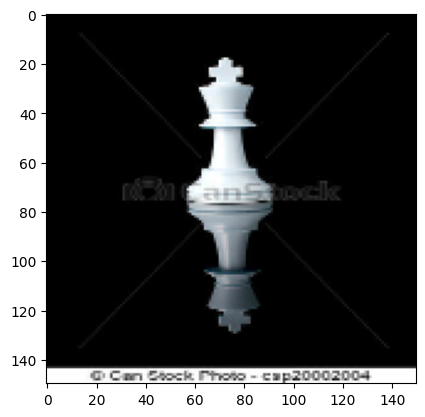

In [15]:
plt.imshow(imagenes[10])

In [16]:
# Convierte la imagen en un arreglo de numpy
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [17]:
# Cargar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [18]:
# Normalizar los valores de los píxeles para que estén entre 0 y 1
train_dataset = train_dataset.map(lambda x, y: (x / 14.0, y))
validation_dataset = validation_dataset.map(lambda x, y: (x / 4.0, y))

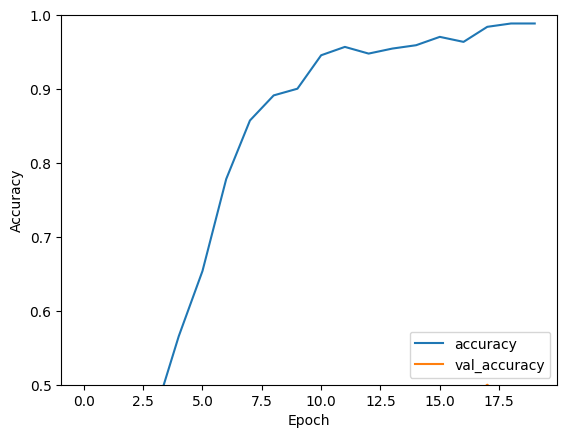

In [19]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 1s 988ms/step


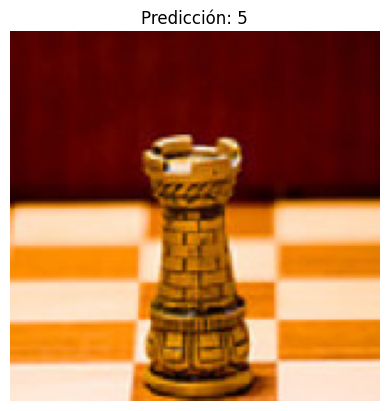

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('Dataset/Chessman-image-dataset/Chess/Rook/00000086.jpg')  # Cambia esta ruta a una imagen de prueba


1/1 [==============================] - 0s 66ms/step


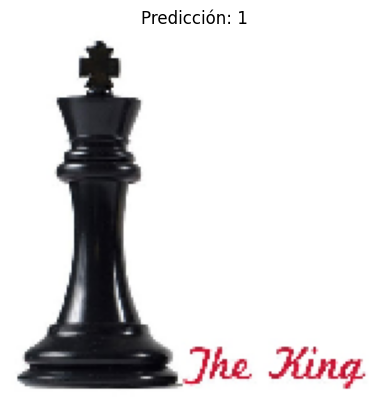

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('Dataset/Chessman-image-dataset/Chess/King/00000012.jpg')  # Cambia esta ruta a una imagen de prueba

1/1 [==============================] - 0s 49ms/step


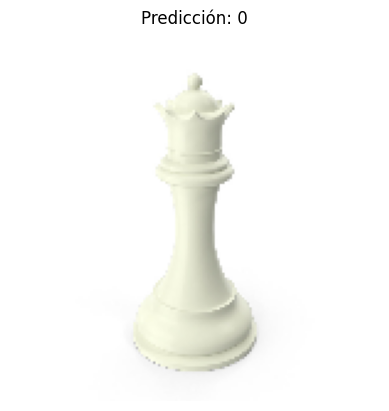

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('Dataset/Chessman-image-dataset/Chess/Queen/00000022.jpg')  # Cambia esta ruta a una imagen de prueba

1/1 [==============================] - 0s 143ms/step


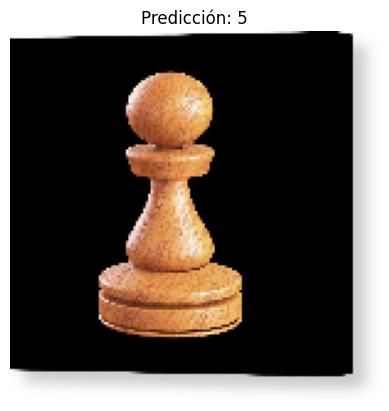

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('Dataset/Chessman-image-dataset/Chess/Pawn/00000060.jpg')  # Cambia esta ruta a una imagen de prueba

1/1 [==============================] - 0s 37ms/step


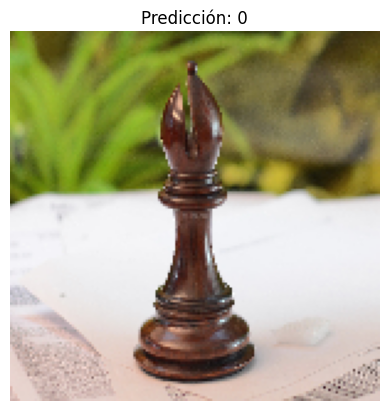

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Función para predecir y mostrar una imagen
def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0) / 255.0  # Crear un batch de un solo elemento

    # Hacer una predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {predicted_class}')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_and_show('Dataset/Chessman-image-dataset/Chess/Bishop/00000012.jpg')  # Cambia esta ruta a una imagen de prueba